Developer: John Pan

'''
List of available variables:

 1. age: continuous
 2. sex: categorical, 2 values {0: female, 1: male}
 3. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
 4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
 5. chol (serum cholesterol level): continuous (mg/dl)
 6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
 7. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
 8. thalach (maximum heart rate achieved): continuous
 9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. target (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}   

'''

### Read in the data, store into a dataframe, and convert categorical variables

In [91]:
import pandas as pd
import numpy as np
import os 
import calendar
import glob
import datetime
import os.path
import xlsxwriter
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
os.chdir(r'H:\HeartDiseaseStudy-master\HeartDiseaseStudy-master')

In [93]:
heart=pd.read_csv('heart.csv')

In [94]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
heart.shape

(303, 14)

In [24]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

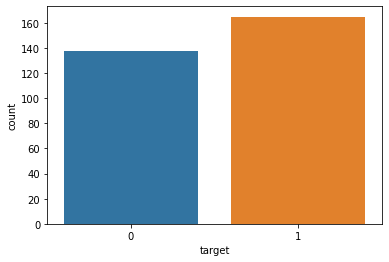

In [30]:
sns.countplot(x='target', data=heart)

In [31]:
heart.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

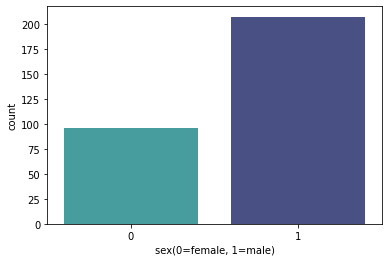

In [35]:
sns.countplot(x='sex', data=heart, palette='mako_r')
plt.xlabel("sex(0=female, 1=male)")
plt.show()

Text(0.5, 0, 'Sex(0=female, 1=male)')

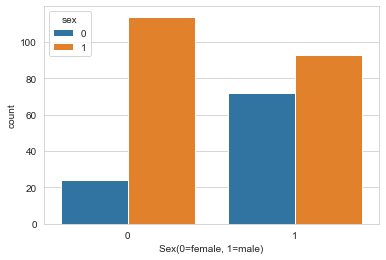

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='sex',  data=heart)
plt.xlabel("Sex(0=female, 1=male)")
#sex - (1 = male, 0=female)

<AxesSubplot:xlabel='target', ylabel='count'>

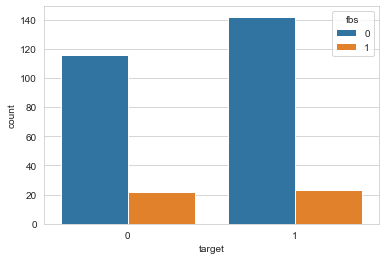

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='fbs',  data=heart)

Text(0.5, 0, 'Age (yr)')

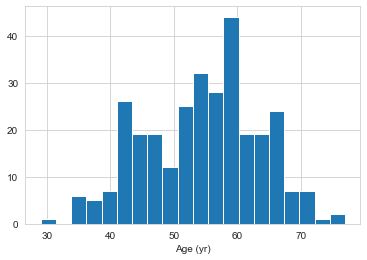

In [44]:
sns.set_style('whitegrid')
heart['age'].hist(bins=20)
plt.xlabel('Age (yr)')

In [46]:
heart.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

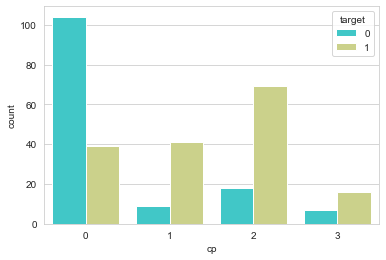

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='cp',hue='target', data=heart, palette='rainbow')

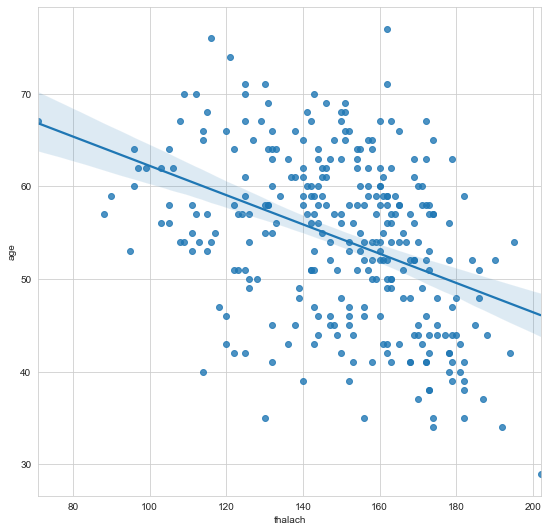

In [97]:
f, ax=plt.subplots(nrows=1, ncols=1, figsize=(9,9))
g = sns.regplot(y="age", x="thalach", data=heart, ax=ax)

<AxesSubplot:>

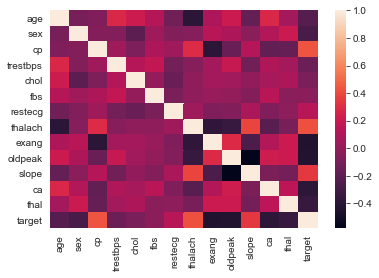

In [49]:
corr=heart.corr()

#heatmap
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)


<AxesSubplot:>

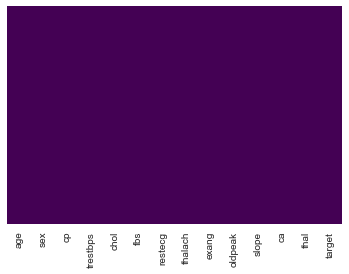

In [52]:
sns.heatmap(heart.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [55]:
sex1=pd.get_dummies(heart['sex'], drop_first=True)
cp1=pd.get_dummies(heart['cp'],drop_first=True)
fbs1=pd.get_dummies(heart['fbs'],drop_first=True)
restecg1=pd.get_dummies(heart['restecg'],drop_first=True)
exang1=pd.get_dummies(heart['exang'],drop_first=True)
slope1=pd.get_dummies(heart['slope'],drop_first=True)
ca1=pd.get_dummies(heart['ca'],drop_first=True)
thal1=pd.get_dummies(heart['thal'],drop_first=True)

In [54]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
heart.drop(['sex','cp', 'fbs','restecg', 'exang', 'slope','ca','thal'],axis=1, inplace=True)

In [58]:
heart=pd.concat([heart, sex1,cp1,fbs1,restecg1,exang1,slope1,cp1,thal1], axis=1)

In [59]:
heart.head()

,age,trestbps,chol,thalach,oldpeak,target,1,1,2,3,1,1,2,1,1,2,1,2,3,1,2,3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0


In [60]:
heart.columns

Index([     'age', 'trestbps',     'chol',  'thalach',  'oldpeak',   'target',
                1,          1,          2,          3,          1,          1,
                2,          1,          1,          2,          1,          2,
                3,          1,          2,          3],
      dtype='object')

In [61]:
from sklearn.linear_model import LogisticRegression

In [64]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop('target', axis=1),
                                                    heart['target'],test_size=0.33,
                                                    random_state=120)

In [76]:
lr=LogisticRegression()

In [77]:
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
predictions=lr.predict(X_test)

In [79]:
predictions

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [83]:
#Evaluation of the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, predictions))
print('Accuracy score:',accuracy_score(y_test,predictions))
print('\n confusion_matrix:',confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.88      0.88      0.88        58

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

Accuracy score: 0.86

 confusion_matrix: [[35  7]
 [ 7 51]]


In [84]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(X_test, y_test)
pred=SVM.predict(X_test)
print(classification_report(y_test,pred))

print(confusion_matrix(y_test, pred))

print('Accuracy score:', accuracy_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.81      0.31      0.45        42
           1       0.65      0.95      0.77        58

    accuracy                           0.68       100
   macro avg       0.73      0.63      0.61       100
weighted avg       0.72      0.68      0.64       100

[[13 29]
 [ 3 55]]
Accuracy score: 0.68


In [85]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('Accuracy score:',accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.88      0.88      0.88        58

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

[[35  7]
 [ 7 51]]
Accuracy score: 0.86
